# Linear Regression with multiple variables (Multivariate Linear regression)


### Importing the required python Modules 

In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

### Cost function `cost` and Gardient Descent function `gradient` are same as Univariate Linear regression

In [2]:
def cost(x,y,theta):
    j = np.sum(np.square((x.dot(theta)- y)))/(2*len(y))
    return j

def gradient(x,y,theta,alpha,n):
    j_hist = np.zeros((n,1))
    for i in range(n):        
        theta = theta-(alpha*(x.dot(theta)-y).T.dot(x)/len(y)).T
        j_hist[i] = cost(x,y,theta)
    return theta, j_hist

### Loading the data from `data1.txt` using [np.loadtext](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) into an [np.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)  called `data`

In [3]:
data = np.loadtxt("data2.txt",delimiter=',')
print("The file \"{0}\" contains Data of Dimenson \"{1}\" and shape \"{2}\" ".format("data2.txt",data.ndim,data.shape))


The file "data2.txt" contains Data of Dimenson "2" and shape "(47, 3)" 


### Writing a function called `normalize` to normalize the data

In [4]:
def normalize(x):
    mu = np.mean(x[:,:],0).T
    sigma = np.std(x[:,:],0).T
    x[:,:] = (x[:,:]-mu)/sigma   
    return x

### Preprocessing the data and Applying Gradient Descent

Theta
[[340412.65957447]
 [109447.7964695 ]
 [ -6578.35485402]]


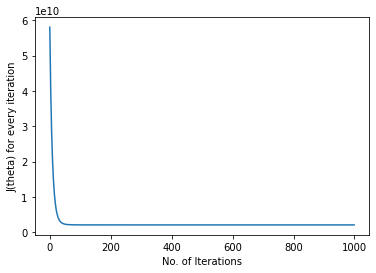

CPU times: user 264 ms, sys: 12.6 ms, total: 276 ms
Wall time: 272 ms


In [5]:
%%time 
# '%%time' the execution time for cell

#Loading the data in x and y
n_samples, n_columns = data.shape
x = data[:,[0,1]].reshape(n_samples,n_columns-1)
y = data[:,2].reshape(n_samples,1)

#Normalizing x and Adding a column containing ones to x
x = normalize(x)
ones = np.ones((n_samples,1),dtype=int)
x = np.append(ones,x ,axis = 1)

#Setting up alpha(learning rate), theta and no. of iterations
_,columns = x.shape
theta = np.zeros((columns,1)) 
iterations = 1000
alpha = 0.06

#Applying gradient descent to the data
theta, j_hist =  gradient(x,y,theta,alpha,iterations)

#Printing and analyzing the results
print("Theta")
print(theta)
plt.plot(range(len(j_hist)),j_hist)
plt.xlabel("No. of Iterations")
plt.ylabel("J(theta) for every iteration")
plt.show()

### Predicting the value of `y` for every value of `x`.

In [6]:
prediction = x.dot(theta)

### Plotting the original `y` and predicted values `prediction`

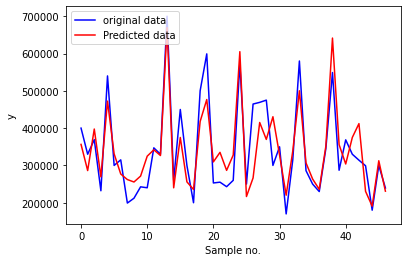

In [7]:
plt.plot(range(n_samples),y,"-b", label="original data")
plt.plot(range(n_samples),prediction,"-r", label="Predicted data")
plt.legend(loc="upper left")
plt.xlabel("Sample no.")
plt.ylabel("y")
plt.show()

### Using Normal Equation method to find optimum theta

In [8]:
%%time
NE_theta = ((np.linalg.inv((x.T).dot(x))).dot(x.T)).dot(y)
print("Theta from Normal equation")
print(NE_theta)

Theta from Normal equation
[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]
CPU times: user 1.9 ms, sys: 373 µs, total: 2.27 ms
Wall time: 1.23 ms


### Prediction using NE_theta

In [9]:
NE_prediction = x.dot(NE_theta)

### Plotting the original `y` and predicted values `prediction` by NE_theta

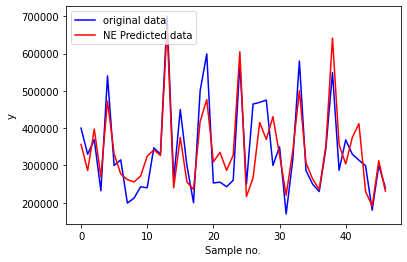

In [10]:
plt.plot(range(n_samples),y,"-b", label="original data")
plt.plot(range(n_samples),NE_prediction,"-r", label="NE Predicted data")
plt.legend(loc="upper left")
plt.xlabel("Sample no.")
plt.ylabel("y")
plt.show()

### Let's make the Hypothesis nonlinear by adding square terms of the features

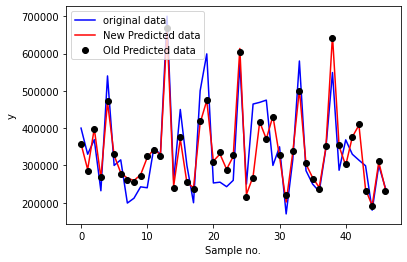

In [14]:
# Loading the data
n_samples, n_columns = data.shape
X = data[:,[0,1]].reshape(n_samples,n_columns-1)

# Squaring and Normalizing the features
X1sq = np.square(X[:,0])
X1sq = ((X1sq-np.mean(X1sq))/np.std(X1sq)).reshape(n_samples,1)
X2sq = np.square(X[:,1])
X2sq = ((X2sq-np.mean(X2sq))/np.std(X2sq)).reshape(n_samples,1)


# Constructing the X
X = normalize(X)
X = np.append(ones,X ,axis = 1)
X = np.append(X,X1sq ,axis = 1)
X = np.append(X,X2sq ,axis = 1)

# Applying Gradient descent to the data
_,columns = X.shape
theta = np.zeros((columns,1)) 
iterations = 1000
alpha = 0.06
theta, j_hist =  gradient(X,y,theta,alpha,iterations)

# Predicting using new non-linear hypothesis
prediction_X = X.dot(theta)

# Plotting the old and new Hypothesis resluts
plt.plot(range(n_samples),y,"-b", label="original data")
plt.plot(range(n_samples),prediction_X,"-r", label="New Predicted data")
plt.plot(range(n_samples),prediction,"ok", label="Old Predicted data")

plt.legend(loc="upper left")
plt.xlabel("Sample no.")
plt.ylabel("y")
plt.show()